In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import pathlib
path = pathlib.Path.cwd()

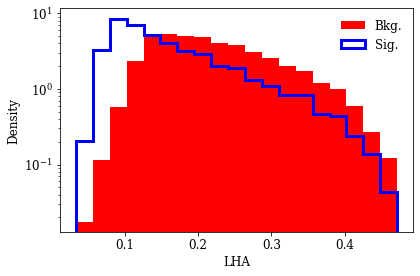

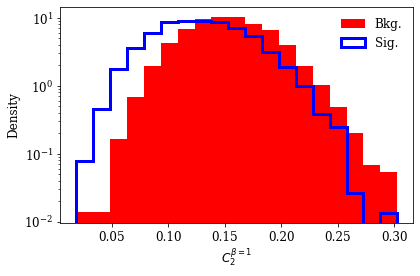

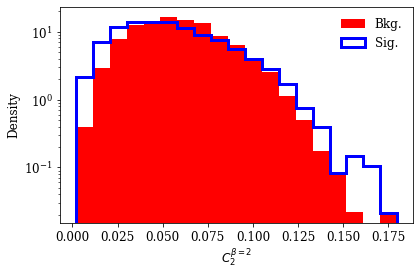

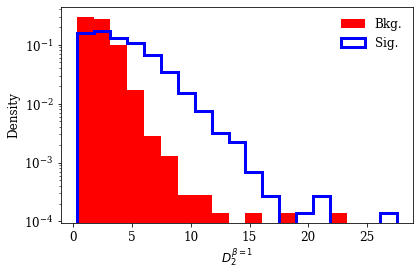

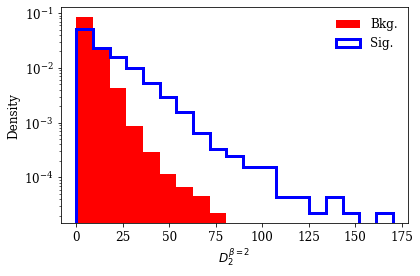

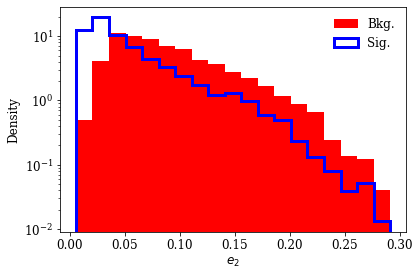

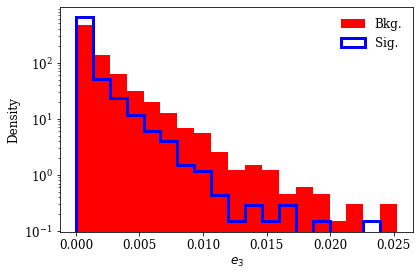

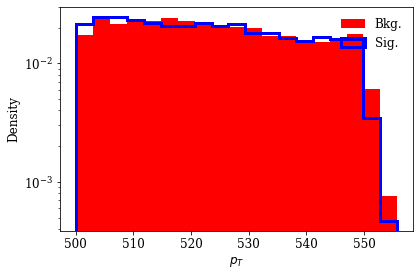

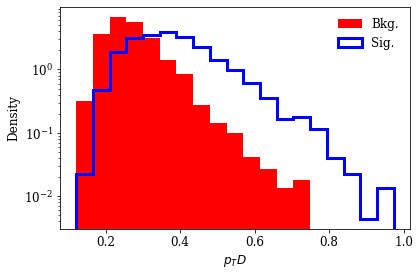

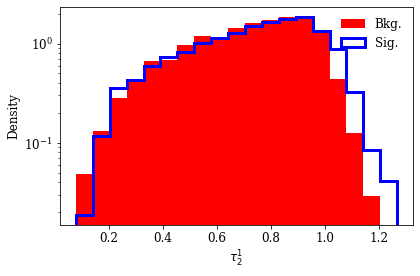

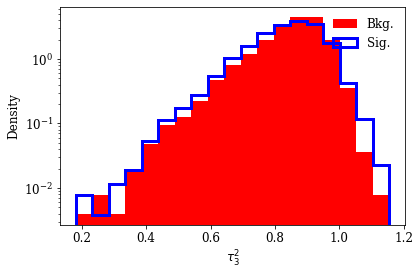

In [10]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.autolayout'] = True
plt.rcParams.update({'font.size': 12})

hl_path = path.parent / "HL"
tex_labels = {'LHA':"LHA", 'c2b1':"$C_2^{\\beta=1}$", 'c2b2':"$C_2^{\\beta=2}$", 'd2b1':"$D_2^{\\beta=1}$", 'd2b2':"$D_2^{\\beta=2}$", 'e2':"$e_2$", 'e3':"$e_3$", 'mass':"$M_{jet}$", 'pT':"$p_T$", 'pTD':"$p_TD$", 'rg':"$r_g$", 'tau21':"$\\tau_2^1$", 'tau32':"$\\tau_3^2$", 'zg':"$z_g$"}
nbins = 20
threshold = 0.0001
labels = list(pd.read_hdf(path.parent / "data" / "HL.h5", "features").columns)
for label in labels:
    fig, ax = plt.subplots()
    hl_file = path.parent / "data" / f"HL.h5"
    HL = pd.read_hdf(hl_file, "features")
    y = pd.read_hdf(hl_file, "targets")
    df = pd.concat([HL, y], axis=1)
    reduced = df[[label, "targets"]]
    grouped = reduced.groupby(["targets"])
    X0 = grouped.get_group(0)[label].values
    X1 = grouped.get_group(1)[label].values       
    bmin = min(min(X0), min(X1))
    bmax = max(max(X0), max(X1))
    bins = np.linspace(bmin, bmax, nbins)
    h0, b0, p0 = ax.hist(X0, bins=bins, density=True, histtype="stepfilled", color="r", label="Bkg.")
    h1, b1, p1 = ax.hist(X1, bins=bins, density=True, histtype="step", color="b", linewidth=3, label="Sig.")
    ax.set_ylabel("Density")
    ax.set_xlabel(tex_labels[label])
    ax.set_yscale("log")
    ax.legend(frameon=False)
    plt.subplots_adjust(wspace=0.1)
    plt.savefig(path.parent / "figures" / "HL" / "png" / f"{label}.png")
    plt.savefig(path.parent / "figures" / "HL" / "pdf" / f"{label}.pdf")
    plt.show()